In [1]:
#imports the libraries essential for this side hustle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import math
import statistics as stats
from sklearn import linear_model 

In [2]:
#Gets the input of a city and state to create a link to start webscraping
city = input('Choose a City: ')
city = city.replace(' ','-') 
city = list(city) 
city[0] = city[0].upper()

cityCounter = 0
for i in city:
    if(i == '_'):
        city[cityCounter+1] = city[cityCounter+1].upper()
    else:
        pass
    cityCounter += 1

empty_city = ''    
for char in city:
    empty_city += char
    
city = empty_city
state = input('Choose a State by its abbreviation(i.e CA for California): ')
state = state.upper()

sourceLink = 'https://www.realtor.com/apartments/{}_{}'.format(city,state)
print(sourceLink)

Choose a City: san francisco
Choose a State by its abbreviation(i.e CA for California): ca
https://www.realtor.com/apartments/San-francisco_CA


In [3]:
#Webscrape Realtor website rent page 1 to get rental prices
truliaScrape = sourceLink 
truliaSource = requests.get(truliaScrape).text
truliaSoup = BeautifulSoup(truliaSource,'lxml')

FPages = []
for i in truliaSoup.find_all('div',class_ = 'price'):
    FPages.append(i.text)

#Make it so it can catch prices under 1000
test2 = []
for i in range(0,len(FPages)):
    try:
        if(',' in FPages[i][17:22]):
            fixedPrice = int(FPages[i][17:22].replace(',',''))
            test2.append(fixedPrice)
        elif('\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContact For Price\n' == FPages[i]):
            test2.append('nan')
        else:
            fixedPrice = int(FPages[i][17:20])
            test2.append(fixedPrice)
    except:
        pass
    
print(test2)
print(len(test2))


[3210, 4045, 3645, 3883, 2683, 3490, 2625, 2569, 2800, 3825, 2957, 3037, 2920, 3231, 2900, 3115, 3289, 3225, 3110, 3045, 3297, 2935, 2349, 3222, 2866, 3245, 2634, 2874, 3870, 2250, 3850, 3399, 2350, 3765, 4535, 3150, 2850, 2800, 3100, 2915, 3150, 3020, 2905, 3983]
44


In [4]:
nanLocator1 = []
nans1 = 0
for value in test2:
    if(value == 'nan'):
        nanLocator1.append(nans1)
    else: pass
    nans1 += 1

In [5]:
#This will give us the amount of total rental properties and the amount of pages to loop through
numberRentals = truliaSoup.find('div',class_ = 'component_ab-sort clearfix').span.text

if(',' in numberRentals[9:15]):
    rentals = int(numberRentals[9:15].replace(',',''))
    print(rentals)
else:
    rentals = int(numberRentals[9:12])
    print(rentals)

pages = math.ceil(rentals/44)
print(pages)

785
18


In [6]:
#beds, gets minimum amount of beds per rental property
beds = []
for i in truliaSoup.find_all('span',class_ = 'data-value meta-beds-display'):
    beds.append(i.text[0])

data_collector = []
for i in truliaSoup.find_all('span',class_ = 'data-value'):
    data_collector.append(i.text)

#Lists for the beds, baths, and area in square feet for all rental properties in first page

switcher = 0
bed_bath_checker = ['0','1','2','3','4']
starter = 1
x = -2
y = 0
indeces = 1
indexSav = []

#Deletes the values that are OK, we wont need this data for what im trying to do
OK_counter = 0
for value in data_collector:
    if((value == 'OK')  or (value == 'Pets')):
        del data_collector[OK_counter]
    else:
        pass
    OK_counter += 1
    
print(data_collector)
print(len(data_collector))

['2 - 3', '1', '780+', '1 - 2', '1 - 2', '543+', '0 - 1', '1', '500+', '1 - 2', '1 - 2', '480+', '1 - 3', '1 - 3', '691+', '1 - 3', '1 - 2', '431+', '0 - 2', '1 - 2', '362+', '0 - 1', '1', '398+', '1 - 2', '1 - 2', '572+', '0 - 2', '1 - 2', '418+', '0 - 3', '1 - 2', '533+', '0 - 3', '1 - 2', '376+', '0 - 2', '1 - 2', '463+', '0 - 2', '1 - 2', '439+', '0 - 2', '1 - 2', '483+', '0 - 3', '1 - 2', '432+', '0 - 3', '1 - 2', '506+', '0 - 3', '1 - 2', '466+', '0 - 3', '1 - 2', '476+', '0 - 2', '1 - 2', '422+', '0 - 2', '1 - 2', '520+', '0 - 3', '1 - 3', '420+', '0 - 2', '1 - 2', '510+', '0 - 2', '1 - 2', '431+', '0 - 2', '1 - 2', '768+', '0 - 3', '1 - 3', '463+', '0 - 3', '1 - 2', '479+', '0 - 2', '1 - 2', '554+', '0 - 2', '1 - 2', '600+', '0', '1', '22+', '1 - 3', '1 - 3', '520+', '0 - 3', '1 - 3', '0', '1', '0 - 2', '1 - 2', '1 - 3', '1 - 2', '673+', '0 - 3', '1 - 2', '460+', '1 - 3', '1 - 2', '405+', '0 - 1', '1', '405+', '0 - 2', '1 - 2', '453+', '0 - 3', '1 - 2', '427+', '0 - 3', '1 - 2'

In [7]:
## Finds the location of NaNs. The NaNs location should be used to figure out which prices to cut, so the prices 
## line up with baths, house, and area

del_num = 2
del_num_container = []

for integer in range(2,len(data_collector),3):
    if('+' in data_collector[integer]):
        del_num+=3
    else:
        integer = integer + 0
        data_collector.insert(integer,'nan')
        del_num_container.append(integer)
        
print(del_num_container)

[95, 98, 101]


In [8]:
#These lines of code will create a function to find location in the prices to delete. So the areas, baths, and 
#bedrooms match in size. Then it will go to the prices and delete those prices from the prices array

def price_deleter(del_array):
    price_locations = []
    for point in del_array:
        x = int((point - 2)/3)
        price_locations.append(x)
    return price_locations

testies = price_deleter(del_num_container)

print(testies)

[31, 32, 33]


In [9]:
#Makes new array that has all of the prices, except for the ones that have inadequatesies
len(test2)
print(testies)
print(test2[28])
print(test2[29])
test3 = []

for number in range(0,len(test2),1):
    if(number in testies):
        pass
    else:
        test3.append(test2[number])
        
print(test3)

[31, 32, 33]
3870
2250
[3210, 4045, 3645, 3883, 2683, 3490, 2625, 2569, 2800, 3825, 2957, 3037, 2920, 3231, 2900, 3115, 3289, 3225, 3110, 3045, 3297, 2935, 2349, 3222, 2866, 3245, 2634, 2874, 3870, 2250, 3850, 4535, 3150, 2850, 2800, 3100, 2915, 3150, 3020, 2905, 3983]


In [10]:
#data_collector2 is an array w/out the nans
data_collector2 = []
for value in data_collector:
    if(value != 'nan'):
        data_collector2.append(value)
    else:pass
    
print(data_collector2)

['2 - 3', '1', '780+', '1 - 2', '1 - 2', '543+', '0 - 1', '1', '500+', '1 - 2', '1 - 2', '480+', '1 - 3', '1 - 3', '691+', '1 - 3', '1 - 2', '431+', '0 - 2', '1 - 2', '362+', '0 - 1', '1', '398+', '1 - 2', '1 - 2', '572+', '0 - 2', '1 - 2', '418+', '0 - 3', '1 - 2', '533+', '0 - 3', '1 - 2', '376+', '0 - 2', '1 - 2', '463+', '0 - 2', '1 - 2', '439+', '0 - 2', '1 - 2', '483+', '0 - 3', '1 - 2', '432+', '0 - 3', '1 - 2', '506+', '0 - 3', '1 - 2', '466+', '0 - 3', '1 - 2', '476+', '0 - 2', '1 - 2', '422+', '0 - 2', '1 - 2', '520+', '0 - 3', '1 - 3', '420+', '0 - 2', '1 - 2', '510+', '0 - 2', '1 - 2', '431+', '0 - 2', '1 - 2', '768+', '0 - 3', '1 - 3', '463+', '0 - 3', '1 - 2', '479+', '0 - 2', '1 - 2', '554+', '0 - 2', '1 - 2', '600+', '0', '1', '22+', '1 - 3', '1 - 3', '520+', '0 - 3', '1 - 3', '0', '1', '0 - 2', '1 - 2', '1 - 3', '1 - 2', '673+', '0 - 3', '1 - 2', '460+', '1 - 3', '1 - 2', '405+', '0 - 1', '1', '405+', '0 - 2', '1 - 2', '453+', '0 - 3', '1 - 2', '427+', '0 - 3', '1 - 2'

In [11]:
#Gets areas, beds, and baths into an array, unfiltered

indech = 0
numBeds1 = []
numBaths1 = []
numFt = []

for i in data_collector2:
    if((',' in i) or ('+' in i) or (float(i[0:2]) > 15)):
        numFt.append(i)
        if(float(data_collector2[indech - 1][0:1]) < 10):
            numBaths1.append(data_collector2[indech - 1][0:1])
        if(float(data_collector2[indech - 2][0:1]) < 10):
            numBeds1.append(data_collector2[indech - 2][0:1])
        else:pass
    else:
        pass
    indech += 1


In [12]:
#These Lines make the variables in the arrays into integers
numBeds1 = [int(i) for i in numBeds1]
numBaths1 = [int(i) for i in numBaths1]

newNumFt = []
for value in numFt:
    if('+' in value):
        if(',' in value):
            value = value.split('+')
            value = value[0].split(',')
            value = value[0] + value[1]
            newNumFt.append(int(value))
        else:
            newNumFt.append(float(value[:-1]))
    elif(',' in value):
        value = value.split(',')
        value = value[0] + value[1]
        newNumFt.append(int(value))
    elif((',' not in value) and ('+' not in value)):
        newNumFt.append(int(value))
    else: pass


newNumFt = [int(i) for i in newNumFt]

print(len(numBeds1))
print(len(numBaths1))
print(len(newNumFt))
print(len(test3))

#test3 contains all of the Prices for first page
#numBeds1 contains all of the Beds for first page
#newNumFt has all of the Feet Area for first page
#numBaths1 has all of the Baths for first page

41
41
41
41


In [13]:
##The code above is for the first page
##The code below is for the 2nd page and more pages

In [14]:
#Will loop through multiple pages on realtor website , extract the data into a list and then insert into a dataframe,
#Then its stats time!

#All indexes are to be outside of the for loops
sourcePrices = []
DataCollector2 = []
DataCollector3 = []

#Scrapes all webpages for that city, will get 2nd and 3rd page
for page in range(2,4,1):
    sourceScrape = sourceLink + '/pg-{}'.format(page)
    SourceSource = requests.get(sourceScrape).text
    SourceSoup = BeautifulSoup(SourceSource,'lxml')
    
    for price in SourceSoup.find_all('div', class_ = 'price'):
        sourcePrices.append(price.text)
        
# Now that we got the unfiltered homeprices, lets get the bed, bath, area of the rental properties
    for data in SourceSoup.find_all('span',class_ = 'data-value'):
        DataCollector2.append(data.text)
        DataCollector3.append(data.text)

In [15]:
print(sourcePrices)

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,563+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,153+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,700+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,600+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,873+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,901+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,175+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,415+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,520+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,600+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,133+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$950+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,905+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,445+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$970+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,680+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,572+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,180+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,175+\n/month\

In [16]:
#Gets the sourcePrices array, if it finds 'Contact For Price' then make it into a nan
holder = 0
hold = []
for i in sourcePrices:
    if('Contact For Price' in i):
        sourcePrices.pop(holder)
        sourcePrices.insert(holder,'nan')
        hold.append(holder)
    else: pass
    holder += 1
        
print(sourcePrices)
print(len(sourcePrices))

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,563+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,153+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,700+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,600+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,873+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,901+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,175+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,415+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,520+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,600+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,133+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$950+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,905+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,445+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$970+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,680+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$2,572+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,180+\n/month\n', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n$3,175+\n/month\

In [17]:
# Cleans the House Price Data
cleanPrices = []
for i in range(0,len(sourcePrices)):
    try:
        if(',' in sourcePrices[i][17:22]):
            Price = int(sourcePrices[i][17:22].replace(',',''))
            cleanPrices.append(Price)
        elif(sourcePrices[i] == 'nan'):
            cleanPrices.append('nan')
        else:
            Price = int(sourcePrices[i][17:20])
            cleanPrices.append(Price)
    except:
        pass
    
print(cleanPrices)
##Prices are now clean, except for NaNs


[3563, 2153, 2700, 3600, 2873, 2901, 3175, 3415, 3520, 2600, 3133, 950, 2905, 3445, 970, 3680, 2572, 3180, 3175, 3536, 3600, 4275, 2895, 5124, 2975, 2882, 3317, 3295, 3006, 3700, 3783, 3010, 2504, 2997, 3017, 2904, 3915, 2500, 3695, 3210, 2995, 3795, 2750, 2450, 'nan', 2870, 2450, 3050, 3300, 5995, 7200, 8495, 5400, 4769, 5515, 3650, 4200, 3500, 5695, 3795, 3795, 3800, 4190, 3765, 2500, 1345, 4500, 2995, 8200, 3399, 6900, 3900, 1150, 3395, 6580, 2250, 4100, 5200, 6250, 3950, 4250, 2200, 3749, 4350, 2000, 1800, 1199, 4700]


In [18]:
#This tells us the amout of NANs there are in the clean Prices. Then creates an array of the locations of the Nans
#Use the array of NANs 
print(len(sourcePrices))
print(len(cleanPrices))
print(cleanPrices.count('nan'))

nanPriceDeleteArray = []
nanPriceDelete = 0

for variable in cleanPrices:
    if(variable == 'nan'):
        nanPriceDeleteArray.append(nanPriceDelete)
    else:
        pass
    nanPriceDelete += 1
    
print(nanPriceDeleteArray)

88
88
1
[44]


In [19]:
#Gets rid of the Pets variable, we wont be using it
OKIndexDeleter = 0
for variable in DataCollector2:
    if(variable == 'OK') or (variable == 'Pets'):
        del DataCollector2[OKIndexDeleter]
        OKIndexDeleter += 1
    else:
        OKIndexDeleter += 1
        
print(DataCollector2)

['0 - 2', '1 - 2', '456+', '0 - 2', '1 - 2', '326+', '0 - 2', '1 - 2', '635+', '1 - 2', '1 - 2', '576+', '0 - 2', '1 - 2', '475+', '0 - 3', '1 - 3', '356+', '0 - 2', '1 - 2', '300+', '0 - 3', '1 - 3', '417+', '0 - 2', '1 - 2', '619+', '1 - 2', '1 - 2', '431+', '0 - 2', '1 - 2', '453+', '1', '1', '215+', '0 - 3', '1 - 2', '332+', '1 - 3', '1 - 2', '670+', '1', '1', '175+', '1 - 2', '1 - 2', '650+', '0 - 2', '1 - 2', '376+', '0 - 3', '1 - 2', '415+', '0 - 2', '1', '288+', '0 - 2', '1 - 2', '543+', '1 - 2', '1 - 2', '609+', '0 - 2', '1 - 2', '404+', '1 - 2', '1 - 2', '950+', '1 - 2', '1 - 2', '484+', '1 - 2', '1', '633+', '0 - 4', '1 - 2', '469+', '0 - 3', '1 - 2', '516+', '1 - 2', '1 - 2', '556+', '1 - 3', '1 - 2', '615+', '2 - 3', '2', '804+', '0 - 2', '1 - 2', '529+', '0 - 2', '1 - 2', '371+', '0 - 2', '1', '450+', '0 - 2', '1', '476+', '0 - 3', '1 - 2', '602+', '0 - 2', '1 - 2', '460+', '2 - 3', '1 - 2', '590+', '0', '1', '300+', '2 - 3', '1', '850+', '0 - 2', '1', '332+', '1 - 2', '1

In [20]:
#These lines of code check for weird extra beds or baths
degenerate = 0
for i in DataCollector2:
    if('.' in i) and (float(i) != 1.5) and (float(i) != 2.5) and (float(i) != 3.5) and (float(i) != 4.5) and (float(i) != 5.5):
            DataCollector2.pop(degenerate)
    else: pass
    degenerate += 1
    
print(DataCollector2)

['0 - 2', '1 - 2', '456+', '0 - 2', '1 - 2', '326+', '0 - 2', '1 - 2', '635+', '1 - 2', '1 - 2', '576+', '0 - 2', '1 - 2', '475+', '0 - 3', '1 - 3', '356+', '0 - 2', '1 - 2', '300+', '0 - 3', '1 - 3', '417+', '0 - 2', '1 - 2', '619+', '1 - 2', '1 - 2', '431+', '0 - 2', '1 - 2', '453+', '1', '1', '215+', '0 - 3', '1 - 2', '332+', '1 - 3', '1 - 2', '670+', '1', '1', '175+', '1 - 2', '1 - 2', '650+', '0 - 2', '1 - 2', '376+', '0 - 3', '1 - 2', '415+', '0 - 2', '1', '288+', '0 - 2', '1 - 2', '543+', '1 - 2', '1 - 2', '609+', '0 - 2', '1 - 2', '404+', '1 - 2', '1 - 2', '950+', '1 - 2', '1 - 2', '484+', '1 - 2', '1', '633+', '0 - 4', '1 - 2', '469+', '0 - 3', '1 - 2', '516+', '1 - 2', '1 - 2', '556+', '1 - 3', '1 - 2', '615+', '2 - 3', '2', '804+', '0 - 2', '1 - 2', '529+', '0 - 2', '1 - 2', '371+', '0 - 2', '1', '450+', '0 - 2', '1', '476+', '0 - 3', '1 - 2', '602+', '0 - 2', '1 - 2', '460+', '2 - 3', '1 - 2', '590+', '0', '1', '300+', '2 - 3', '1', '850+', '0 - 2', '1', '332+', '1 - 2', '1

In [21]:
#These lines of code will find the rentals that have two areas (area and sqft loft) and pops off the extra one 
extraAreaLocator = []
for i in range(0,len(DataCollector2),1):
    try:
        if('+' in DataCollector2[i]) or (',' in DataCollector2[i]) or (int(DataCollector2[i]) > 15):
            if('+' in DataCollector2[i-1]) or (',' in DataCollector2[i-1]) or (int(DataCollector2[i-1]) > 15):
                DataCollector2.pop(i)
            else: pass
        else: pass
    except: pass

print(DataCollector2)


['0 - 2', '1 - 2', '456+', '0 - 2', '1 - 2', '326+', '0 - 2', '1 - 2', '635+', '1 - 2', '1 - 2', '576+', '0 - 2', '1 - 2', '475+', '0 - 3', '1 - 3', '356+', '0 - 2', '1 - 2', '300+', '0 - 3', '1 - 3', '417+', '0 - 2', '1 - 2', '619+', '1 - 2', '1 - 2', '431+', '0 - 2', '1 - 2', '453+', '1', '1', '215+', '0 - 3', '1 - 2', '332+', '1 - 3', '1 - 2', '670+', '1', '1', '175+', '1 - 2', '1 - 2', '650+', '0 - 2', '1 - 2', '376+', '0 - 3', '1 - 2', '415+', '0 - 2', '1', '288+', '0 - 2', '1 - 2', '543+', '1 - 2', '1 - 2', '609+', '0 - 2', '1 - 2', '404+', '1 - 2', '1 - 2', '950+', '1 - 2', '1 - 2', '484+', '1 - 2', '1', '633+', '0 - 4', '1 - 2', '469+', '0 - 3', '1 - 2', '516+', '1 - 2', '1 - 2', '556+', '1 - 3', '1 - 2', '615+', '2 - 3', '2', '804+', '0 - 2', '1 - 2', '529+', '0 - 2', '1 - 2', '371+', '0 - 2', '1', '450+', '0 - 2', '1', '476+', '0 - 3', '1 - 2', '602+', '0 - 2', '1 - 2', '460+', '2 - 3', '1 - 2', '590+', '0', '1', '300+', '2 - 3', '1', '850+', '0 - 2', '1', '332+', '1 - 2', '1

In [22]:
##find a way to get the dashes by themselves, i.e 0 - 2 becomes 0. Then edit the bottom block to work values like '420'
##w/out + or ,

test = ['0 - 2', '420+','6,969+','123','2,800','22+','3,333','1 - 2','2.5']
newTest = []
passer = 0
y = ''

for string in DataCollector2:
    if('-' in string):
        x = int(string[0])
        newTest.append(x)
    elif('.' in string):
        newTest.append(float(string))
    elif(('+' in string) or (',' in string)):
        for char in string:
            if(char == '+'):
                pass
            elif(char == ','):
                pass
            else:
                y += char
        newTest.append(y)
        y = ''
    else:
        newTest.append(int(string))

DataCollector3 = []
for number in newTest:
    if(isinstance(number,float) == True):
        DataCollector3.append(number)
    else:
        DataCollector3.append(int(number))


print(DataCollector3)
##This seems to work now, it's time to test on the actual data and not the test data

[0, 1, 456, 0, 1, 326, 0, 1, 635, 1, 1, 576, 0, 1, 475, 0, 1, 356, 0, 1, 300, 0, 1, 417, 0, 1, 619, 1, 1, 431, 0, 1, 453, 1, 1, 215, 0, 1, 332, 1, 1, 670, 1, 1, 175, 1, 1, 650, 0, 1, 376, 0, 1, 415, 0, 1, 288, 0, 1, 543, 1, 1, 609, 0, 1, 404, 1, 1, 950, 1, 1, 484, 1, 1, 633, 0, 1, 469, 0, 1, 516, 1, 1, 556, 1, 1, 615, 2, 2, 804, 0, 1, 529, 0, 1, 371, 0, 1, 450, 0, 1, 476, 0, 1, 602, 0, 1, 460, 2, 1, 590, 0, 1, 300, 2, 1, 850, 0, 1, 332, 1, 1, 526, 1, 1, 665, 1, 1, 650, 0, 1, 404, 1, 1, 707, 0, 1, 386, 1, 1, 1100, 1, 1, 800, 1, 1, 700, 3, 2, 1200, 5, 2, 1170, 4, 3, 2, 1, 781, 3, 2, 900, 1, 1, 2, 2, 1034, 2, 1, 1000, 1, 1, 780, 3, 2, 1500, 2, 2, 1, 1, 800, 1, 1, 538, 0, 1, 0, 1, 1, 1, 448, 6, 4, 2100, 2, 1, 1000, 0, 1, 350, 5, 3, 2000, 1, 1, 500, 2, 2, 1100, 2, 1, 1200, 6, 4, 1750, 1, 1, 572, 4, 2, 1000, 0, 1, 290, 2, 2, 1300, 4, 1, 1000, 3, 2, 1200, 1, 1, 550, 1, 1, 730, 1, 1, 1600, 1, 1, 1038, 2, 2, 1134, 2, 2, 967, 0, 1, 178, 4, 3, 2850, 1, 2, 1534]


In [23]:
#Will now have to rework the bottom code to work with actual integers, make it check for number abover 10 or 15
print(len(DataCollector3))
print(len(DataCollector2))

259
259


In [24]:
del_num2 = 2
del_num_container2 = []
for integer in range(2,len(DataCollector2),3):
    if(DataCollector3[integer] > 15):
        del_num2 += 3
    else:
        integer = integer + 0
        DataCollector3.insert(integer,'nan')
        del_num_container2.append(integer)
        
print(del_num_container2)

[155, 164, 179, 188, 191]


In [25]:
print(DataCollector3)

[0, 1, 456, 0, 1, 326, 0, 1, 635, 1, 1, 576, 0, 1, 475, 0, 1, 356, 0, 1, 300, 0, 1, 417, 0, 1, 619, 1, 1, 431, 0, 1, 453, 1, 1, 215, 0, 1, 332, 1, 1, 670, 1, 1, 175, 1, 1, 650, 0, 1, 376, 0, 1, 415, 0, 1, 288, 0, 1, 543, 1, 1, 609, 0, 1, 404, 1, 1, 950, 1, 1, 484, 1, 1, 633, 0, 1, 469, 0, 1, 516, 1, 1, 556, 1, 1, 615, 2, 2, 804, 0, 1, 529, 0, 1, 371, 0, 1, 450, 0, 1, 476, 0, 1, 602, 0, 1, 460, 2, 1, 590, 0, 1, 300, 2, 1, 850, 0, 1, 332, 1, 1, 526, 1, 1, 665, 1, 1, 650, 0, 1, 404, 1, 1, 707, 0, 1, 386, 1, 1, 1100, 1, 1, 800, 1, 1, 700, 3, 2, 1200, 5, 2, 1170, 4, 3, 'nan', 2, 1, 781, 3, 2, 900, 1, 1, 'nan', 2, 2, 1034, 2, 1, 1000, 1, 1, 780, 3, 2, 1500, 2, 2, 'nan', 1, 1, 800, 1, 1, 538, 0, 1, 'nan', 0, 1, 'nan', 1, 1, 448, 6, 4, 2100, 2, 1, 1000, 0, 1, 350, 5, 3, 2000, 1, 1, 500, 2, 2, 1100, 2, 1, 1200, 6, 4, 1750, 1, 1, 572, 4, 2, 1000, 0, 1, 290, 2, 2, 1300, 4, 1, 1000, 3, 2, 1200, 1, 1, 550, 1, 1, 730, 1, 1, 1600, 1, 1, 1038, 2, 2, 1134, 2, 2, 967, 0, 1, 178, 4, 3, 2850, 1, 2, 1534]


In [26]:
#This variable uses the function we made before to give us the location 
testies2 = price_deleter(del_num_container2)


In [27]:
print(testies2)

[51, 54, 59, 62, 63]


In [28]:
print(cleanPrices[50])

7200


In [29]:
#This gets rid of the prices that do not have area in their description
cleanPrices2 = []

for number in range(0,len(cleanPrices),1):
    if(number in testies2):
        pass
    else:
        cleanPrices2.append(cleanPrices[number])
        
print(cleanPrices2)

[3563, 2153, 2700, 3600, 2873, 2901, 3175, 3415, 3520, 2600, 3133, 950, 2905, 3445, 970, 3680, 2572, 3180, 3175, 3536, 3600, 4275, 2895, 5124, 2975, 2882, 3317, 3295, 3006, 3700, 3783, 3010, 2504, 2997, 3017, 2904, 3915, 2500, 3695, 3210, 2995, 3795, 2750, 2450, 'nan', 2870, 2450, 3050, 3300, 5995, 7200, 5400, 4769, 3650, 4200, 3500, 5695, 3795, 3800, 2500, 1345, 4500, 2995, 8200, 3399, 6900, 3900, 1150, 3395, 6580, 2250, 4100, 5200, 6250, 3950, 4250, 2200, 3749, 4350, 2000, 1800, 1199, 4700]


In [30]:
print(DataCollector3)

[0, 1, 456, 0, 1, 326, 0, 1, 635, 1, 1, 576, 0, 1, 475, 0, 1, 356, 0, 1, 300, 0, 1, 417, 0, 1, 619, 1, 1, 431, 0, 1, 453, 1, 1, 215, 0, 1, 332, 1, 1, 670, 1, 1, 175, 1, 1, 650, 0, 1, 376, 0, 1, 415, 0, 1, 288, 0, 1, 543, 1, 1, 609, 0, 1, 404, 1, 1, 950, 1, 1, 484, 1, 1, 633, 0, 1, 469, 0, 1, 516, 1, 1, 556, 1, 1, 615, 2, 2, 804, 0, 1, 529, 0, 1, 371, 0, 1, 450, 0, 1, 476, 0, 1, 602, 0, 1, 460, 2, 1, 590, 0, 1, 300, 2, 1, 850, 0, 1, 332, 1, 1, 526, 1, 1, 665, 1, 1, 650, 0, 1, 404, 1, 1, 707, 0, 1, 386, 1, 1, 1100, 1, 1, 800, 1, 1, 700, 3, 2, 1200, 5, 2, 1170, 4, 3, 'nan', 2, 1, 781, 3, 2, 900, 1, 1, 'nan', 2, 2, 1034, 2, 1, 1000, 1, 1, 780, 3, 2, 1500, 2, 2, 'nan', 1, 1, 800, 1, 1, 538, 0, 1, 'nan', 0, 1, 'nan', 1, 1, 448, 6, 4, 2100, 2, 1, 1000, 0, 1, 350, 5, 3, 2000, 1, 1, 500, 2, 2, 1100, 2, 1, 1200, 6, 4, 1750, 1, 1, 572, 4, 2, 1000, 0, 1, 290, 2, 2, 1300, 4, 1, 1000, 3, 2, 1200, 1, 1, 550, 1, 1, 730, 1, 1, 1600, 1, 1, 1038, 2, 2, 1134, 2, 2, 967, 0, 1, 178, 4, 3, 2850, 1, 2, 1534]


In [31]:
#Gets the beds, baths, and areas with DataCollector3
areasHolder = []
bedsHolder = []
bedsHolder2 = []
bathsHolder = []
indexParser = 0

for value in DataCollector3:
    try:
        
        if(value == 'nan'):
            pass
        elif(value >= 10):
            areasHolder.append(value)
            if(DataCollector3[indexParser - 1] < 10):
                bathsHolder.append(DataCollector3[indexParser - 1])
            if(DataCollector3[indexParser - 2] < 10):
                bedsHolder.append(DataCollector3[indexParser - 2])
            else: 
                pass
        else: 
            pass

        indexParser += 1
    except:
        pass
        
print(len(areasHolder))
print(len(bedsHolder))
print(len(bathsHolder))
print(len(cleanPrices2))

83
83
83
83


In [32]:
#Gets the beds, baths, and areas 

areasHolder = []
bedsHolder = []
bedsHolder2 = []
bathsHolder = []
indexParser = 0

for value in DataCollector2:
    if(value == 'nan'):
        pass
    elif((',' in value ) or ('+' in value) or (float(value[0:2]) > 15)):
        areasHolder.append(value)
        if(float(DataCollector2[indexParser - 1][0:1]) < 10):
            bathsHolder.append(DataCollector2[indexParser - 1][0:1])
        if(float(DataCollector2[indexParser - 2][0:1]) < 10):
            bedsHolder.append(DataCollector2[indexParser - 2][0:1])
            bedsHolder2.append(DataCollector2[indexParser - 2])
        else:
            pass
    else:
        pass
            
    indexParser += 1
    
print(len(areasHolder))
print(len(bedsHolder))
print(len(bathsHolder))
print(len(cleanPrices2))

83
83
83
83


In [33]:
#These Lines make the variables in the arrays into integers
#All variables should be the same length
bedsHolder = [int(i) for i in bedsHolder]
bathsHolder = [int(i) for i in bathsHolder]

newArea = []
for value in areasHolder:
    if('+' in value):
        if(',' in value):
            value = value.split('+')
            value = value[0].split(',')
            value = value[0] + value[1]
            newArea.append(int(value))
        else:
            newArea.append(float(value[:-1]))
    elif(',' in value):
        value = value.split(',')
        value = value[0] + value[1]
        newArea.append(int(value))
    elif((',' not in value) and ('+' not in value)):
        newArea.append(int(value))
    else: pass


newArea = [int(i) for i in newArea]
    
print(len(newArea))
print(len(bedsHolder))
print(len(bathsHolder))
print(len(cleanPrices2))

83
83
83
83


In [34]:
# The array for 1st pg Prices is test3
# The array for 1st pg Beds is numBeds1
# The array for 1st pg Baths is numBaths1
# The array for 1st pg Area is newNumFt
# The array for 2nd pg+ Prices is cleanPrices2
# The array for 2nd pg+ Beds is bedsHolder
# The array for 2nd pg+ Baths is bathsHolder
# The array for 2nd pg+ Area is newArea

## This'll combine the first page arrays to the 2nd+ arrays

AllPrices = test3 + cleanPrices2
AllBeds = numBeds1 + bedsHolder
AllBaths = numBaths1 + bathsHolder
AllArea = newNumFt + newArea

In [35]:
#Replaces the 'nan's w/ real NANs in the Prices column
local = []
lac = 0
for i in range(0,len(AllPrices),1):
    if(AllPrices[i] == 'nan'):
        AllPrices.pop(i)
        AllPrices.insert(i,np.nan)
        print(i)
        print(AllPrices[i])
    else: pass
    

85
nan


In [36]:
#This is the final DataFrame that we can do stats with; however, we need to remove the rows that have NANs in Prices
FinalDataFrame = pd.DataFrame({'Prices':AllPrices,
                              'Beds':AllBeds,
                              'Baths':AllBaths,
                              'Area':AllArea})

In [37]:
#We will have to drop the Rows that have NANS in the dataframe
print(FinalDataFrame.shape)
FinalDataFrame = FinalDataFrame.dropna()
print(FinalDataFrame.shape)

(124, 4)
(123, 4)


In [38]:
#Makes the Prices column into integer values
FinalDataFrame['Prices'] = [int(i) for i in  FinalDataFrame['Prices']]

In [39]:
FinalDataFrame

,Prices,Beds,Baths,Area
0,3210,2,1,780
1,4045,1,1,543
2,3645,0,1,500
3,3883,1,1,480
4,2683,1,1,691
5,3490,1,1,431
6,2625,0,1,362
7,2569,0,1,398
8,2800,1,1,572
9,3825,0,1,418


In [40]:
Rental_Multivariate_Regression = linear_model.LinearRegression()
Rental_Multivariate_Regression.fit(FinalDataFrame[['Beds','Baths','Area']],FinalDataFrame.Prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(Rental_Multivariate_Regression.coef_)
print(Rental_Multivariate_Regression.intercept_)

[ 6.23221424e+02 -9.66113755e+02  2.81169152e-01]
3786.0577938957767


In [42]:
Rental_Multivariate_Regression.predict([[2,1,900]])

array([4319.4391244])

In [43]:
FinalDataFrame['Prices'].mean()

3386.829268292683

In [44]:
denomR = [((number - FinalDataFrame['Prices'].mean())**2) for number in FinalDataFrame['Prices']]

In [45]:
numerator = []
for beds,baths,area in zip(FinalDataFrame['Beds'],FinalDataFrame['Baths'],FinalDataFrame['Area']):
    prediction = Rental_Multivariate_Regression.predict([[beds,baths,area]])
    numeratorVariables = ((prediction - FinalDataFrame['Prices'].mean())**2)
    convertor = float(numeratorVariables)
    numerator.append(convertor)
    
print(numerator)

[807966.4819732439, 43685.61680136871, 181732.24664287234, 36594.69068844234, 62812.429096896114, 31513.38576830041, 216319.86659836068, 207006.71524786673, 47160.61555513602, 201921.28509870818, 173907.4075734783, 212673.73624119526, 190710.30633298002, 196649.65073753297, 185830.42202371344, 198399.11469421608, 180296.741543308, 189974.29182588434, 187531.18742756062, 200911.788453734, 176969.36535015964, 201416.22055185225, 179342.90038728918, 198649.6705653374, 123164.02143689925, 190710.30633298002, 186801.33929566172, 169017.61413794852, 158550.28891743804, 314383.9379661072, 41024.1343933521, 60301.20391315883, 191447.74384973646, 28971.342537531986, 205219.62059126492, 193173.96531529294, 199653.4751716684, 194907.9342778919, 196151.22690242736, 28494.74176437779, 76292.22490497725, 192433.20744266172, 225837.93134000845, 150810.14374949347, 47650.36113224855, 187774.7863625625, 217891.98062536094, 232839.52762970954, 202174.05454041337, 154324.46277421917, 31513.38576830041, 1

In [46]:
print(sum(numerator))
print(sum(denomR))

35714694.824475065
156857433.41463417


In [47]:
RSquared = sum(numerator)/sum(denomR)
print(RSquared)

0.2276888895030398


(array([60., 39.,  0., 13.,  0.,  4.,  3.,  0.,  2.,  2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

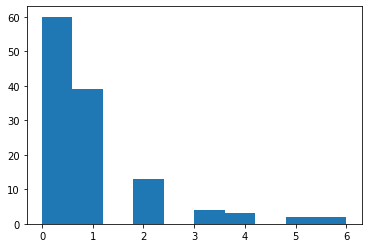

In [48]:
plt.hist(FinalDataFrame['Beds'])

(array([ 8., 66., 25., 12.,  5.,  3.,  2.,  1.,  0.,  1.]),
 array([  22. ,  304.8,  587.6,  870.4, 1153.2, 1436. , 1718.8, 2001.6,
        2284.4, 2567.2, 2850. ]),
 <a list of 10 Patch objects>)

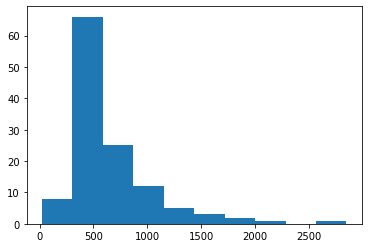

In [49]:
plt.hist(FinalDataFrame['Area'])

(array([106.,   0.,   0.,  13.,   0.,   0.,   2.,   0.,   0.,   2.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

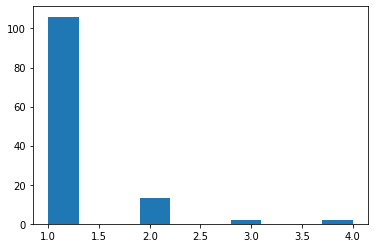

In [50]:
plt.hist(FinalDataFrame['Baths'])

(array([ 5.,  7., 45., 39., 15.,  4.,  3.,  2.,  2.,  1.]),
 array([ 950., 1675., 2400., 3125., 3850., 4575., 5300., 6025., 6750.,
        7475., 8200.]),
 <a list of 10 Patch objects>)

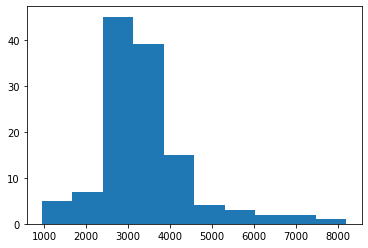

In [51]:
plt.hist(FinalDataFrame['Prices'])

In [52]:
##I have tried with multiple cities and there seems to be a skew to the right, I'll try to to do a log transformations
##On the prices and area because they're non zeros, and for beds and baths ill do a square root transformation

In [53]:
logArea = [math.log(number) for number in FinalDataFrame['Area']]

(array([ 1.,  0.,  0.,  0.,  3., 20., 60., 24., 12.,  3.]),
 array([3.09104245, 3.57744564, 4.06384882, 4.550252  , 5.03665518,
        5.52305836, 6.00946155, 6.49586473, 6.98226791, 7.46867109,
        7.95507427]),
 <a list of 10 Patch objects>)

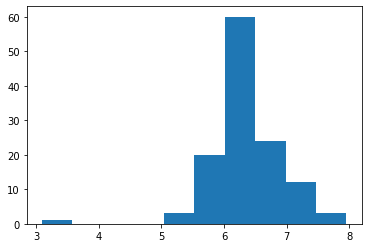

In [54]:
plt.hist(logArea)

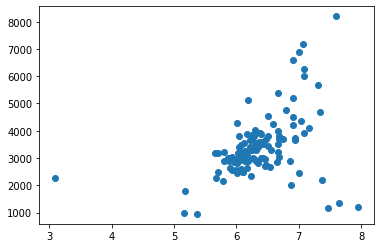

In [55]:
plt.scatter(logArea,FinalDataFrame['Prices'])

(array([ 5.,  7., 45., 39., 15.,  4.,  3.,  2.,  2.,  1.]),
 array([ 950., 1675., 2400., 3125., 3850., 4575., 5300., 6025., 6750.,
        7475., 8200.]),
 <a list of 10 Patch objects>)

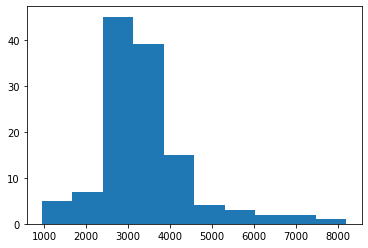

In [56]:
plt.hist(FinalDataFrame['Prices'])

In [57]:
logPrices = [math.log(number) for number in FinalDataFrame['Prices'] ]

(array([ 3.,  2.,  1.,  3., 16., 53., 30.,  7.,  5.,  3.]),
 array([6.85646198, 7.07200473, 7.28754747, 7.50309022, 7.71863296,
        7.93417571, 8.14971845, 8.3652612 , 8.58080394, 8.79634669,
        9.01188943]),
 <a list of 10 Patch objects>)

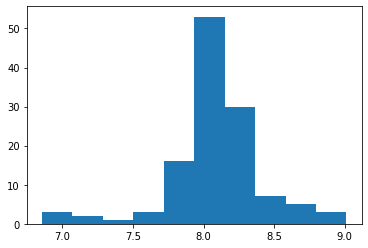

In [58]:
plt.hist(logPrices)

In [59]:
len(FinalDataFrame)

123

In [60]:
RSquaredAdj = RSquared * ((len(FinalDataFrame)-1)/(len(FinalDataFrame)-4-1))
print(RSquaredAdj)

0.2354071569438208


In [61]:
float(Rental_Multivariate_Regression.predict([[1,1,698]]))

3639.4215316035293

In [62]:
#This is an array of residuals
residuals = []
for beds,baths,area,prices in zip(FinalDataFrame['Beds'],FinalDataFrame['Baths'],FinalDataFrame['Area'],FinalDataFrame['Prices']):
    residual = prices - float(Rental_Multivariate_Regression.predict([[beds,baths,area]]))
    residuals.append(residual)
    
residuals

[-1075.6988261114157,
 449.15968701979637,
 684.4713845837491,
 304.8733436215348,
 -954.4533475366698,
 -74.34936791044584,
 -296.72727238387097,
 -362.84936187057883,
 -803.994218400052,
 887.5272550812501,
 -12.807197445733436,
 111.33635948240953,
 -30.125356777134584,
 287.62270288067066,
 -55.74873982530562,
 173.59088694753063,
 326.7843696692976,
 274.03113576563965,
 156.21944424155436,
 106.40257847161593,
 330.8480015355781,
 -3.035083223566744,
 -614.3403069403366,
 280.8720560999391,
 -169.88194826174276,
 294.8746432228654,
 -320.6240632156714,
 -101.71174964631291,
 881.3544693428939,
 -576.1297605649634,
 260.6265775251927,
 902.6076972066844,
 200.71815068009118,
 -707.0389699478237,
 -133.8175459374388,
 152.6863347469507,
 -25.00326729042672,
 204.65451881381068,
 76.06036457585378,
 -650.6331241857811,
 319.9602595941524,
 614.8428272897254,
 -758.6051828971631,
 -298.4864509914055,
 -5.1188950096861845,
 -80.4993866060372,
 -19.04025746941943,
 270.70521506545947,


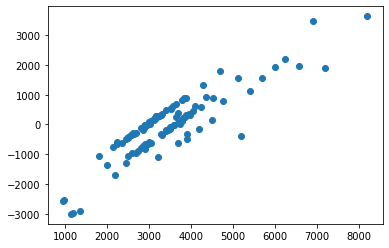

In [63]:
plt.scatter(FinalDataFrame['Prices'],residuals)

In [64]:
#New Multivariate Regression
Rental_Multivariate_Regression = linear_model.LinearRegression()

In [66]:
#Puting log values of Area to transform and slightly increase regression
FinalDataFrame['logArea'] = logArea

In [68]:
Rental_Multivariate_Regression.fit(FinalDataFrame[['Beds','Baths','logArea']],FinalDataFrame.Prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
from sklearn.metrics import r2_score

In [71]:
prediction = []
for beds,baths,area in zip(FinalDataFrame['Beds'],FinalDataFrame['Baths'],FinalDataFrame['logArea']):
    prediction.append(float(Rental_Multivariate_Regression.predict([[beds,baths,area]])))
    
print(prediction)

[4309.210151332267, 3588.833094419215, 3028.0173297630545, 3518.476350878312, 3726.3426557930006, 3457.0453028927705, 2843.764209601626, 2897.8527083018184, 3618.5163800828336, 2925.824333996444, 3064.4803219949927, 2865.412054221908, 2984.1561648215056, 2953.789429275695, 3008.282672440025, 2944.619201578528, 3034.8226615422695, 2987.840829186351, 2999.953956891344, 2931.257773948476, 3050.3930165607517, 2928.547522377801, 3039.3148649307386, 2943.297052938845, 3272.86840629524, 2984.1561648215056, 3003.5383051173776, 3086.5265692670446, 3132.0330327755523, 1246.0016307408007, 3564.141266514677, 3711.2844152309162, 2980.447547974113, 3421.547781025263, 2907.7995310713372, 2971.6991877704804, 2937.9776029069185, 2962.814585124634, 2956.3826468437137, 3414.4606478658143, 3796.922867305245, 2975.464923440785, 2784.0054218854625, 3164.3781165591204, 3622.4920538908095, 2998.754152279453, 2834.2290536725095, 2736.5877955535325, 2924.4578497918096, 3149.8189371132066, 3457.0453028927705, 29

In [72]:
#r^2 goes up slightly, oh well off to the next side project
r2_score(FinalDataFrame['Prices'],prediction)

0.2676455256437633